# Projet Machine-Learning par Antoine Théologien
## Test d'un réseau de neurones à deux couches

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from module import *
from loss import *
from mltools import *

def train_nn(X, y, model, loss, epochs=1000, lr=0.1, batch_size=16):
    losses = []
    n = X.shape[0]  
    
    for epoch in range(epochs):
        indices = np.random.permutation(n)  
        X_shuffled, y_shuffled = X[indices], y[indices]

        epoch_loss = 0
        for i in range(0, n, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            y_hat = model.forward(X_batch)
            batch_loss = np.mean(loss.forward(y_batch, y_hat))
            epoch_loss += batch_loss * len(X_batch) / n 

            model.zero_grad()
            model.backward(X_batch, y_batch, loss)
            model.update_parameters(lr)

        losses.append(epoch_loss)
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {epoch_loss:.4f}")

    return losses, model



Epoch 0: Loss = 0.0450
Epoch 100: Loss = 0.0003
Epoch 200: Loss = 0.0002
Epoch 300: Loss = 0.0001
Epoch 400: Loss = 0.0001


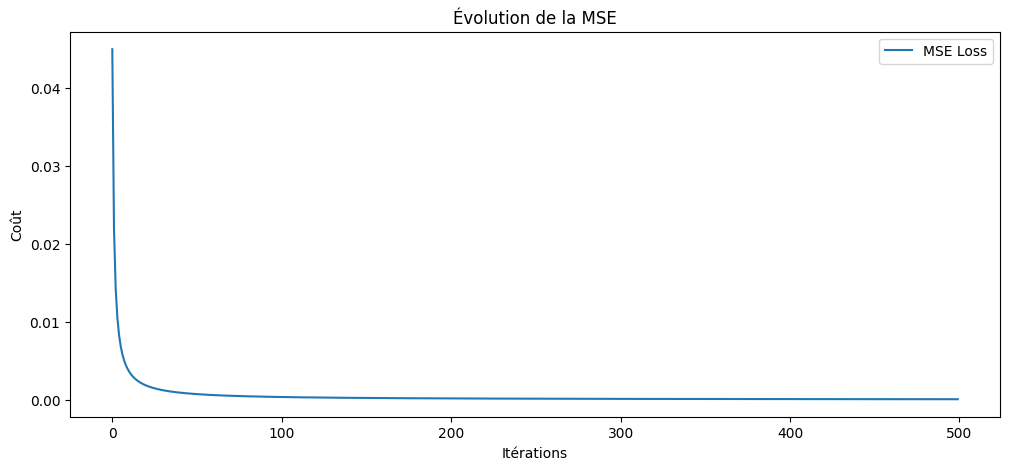

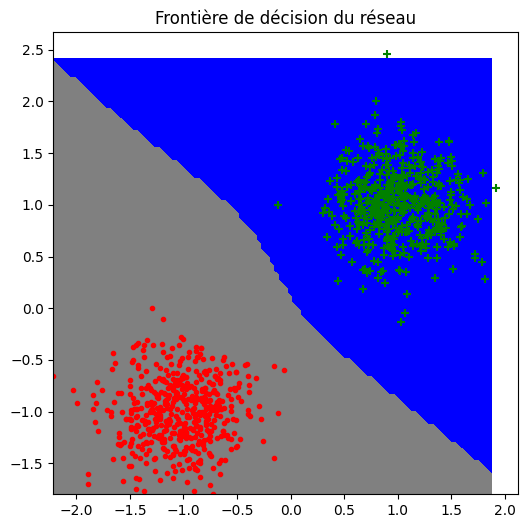

(1000, 2)
Epoch 0: Loss = 0.4795
Epoch 100: Loss = 0.0102
Epoch 200: Loss = 0.0068
Epoch 300: Loss = 0.0056
Epoch 400: Loss = 0.0050


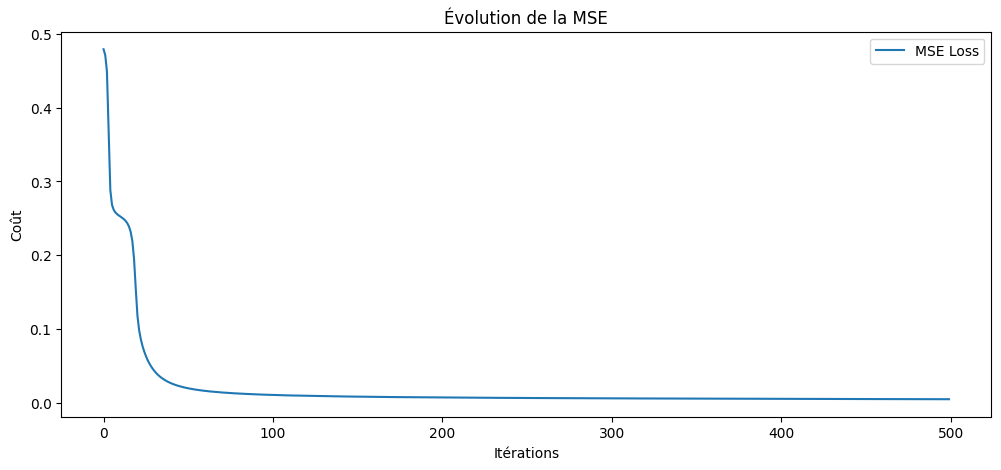

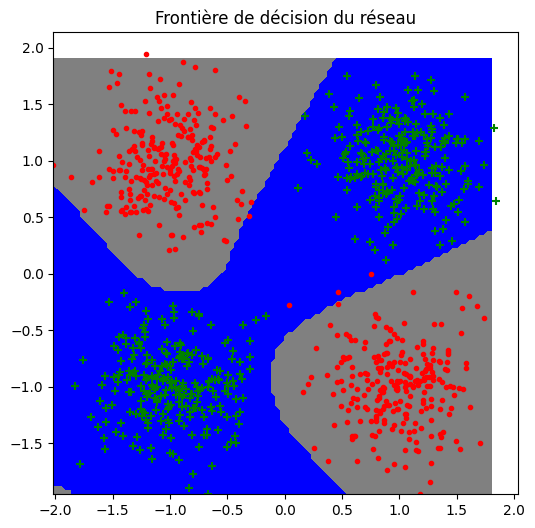

(1000, 2)
Epoch 0: Loss = 0.3672
Epoch 100: Loss = 0.2492
Epoch 200: Loss = 0.2486
Epoch 300: Loss = 0.2485
Epoch 400: Loss = 0.2484


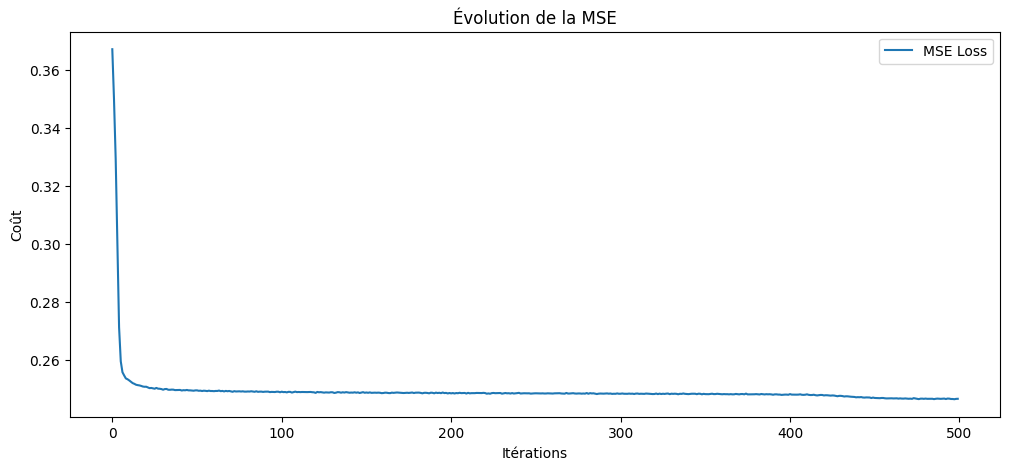

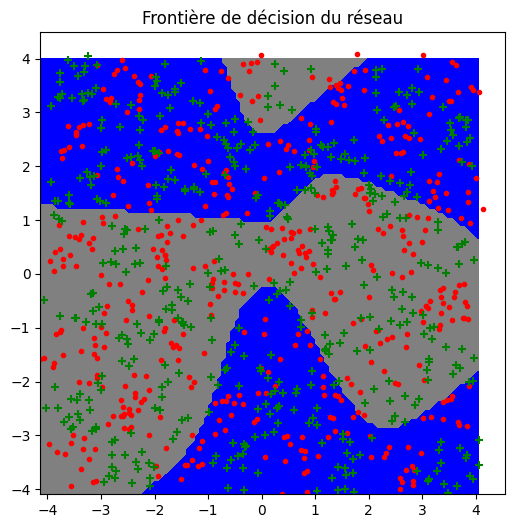

(1000, 2)


In [4]:
for i in [0,1,2]:
    datax, datay = gen_arti(data_type=i, epsilon=0.1)
    datay = np.where(datay==-1,0,1).reshape((-1,1))

    model = SimpleNN(input_dim=2, hidden_dim=5, output_dim=1)
    loss = MSELoss()

    # Entraînement
    losses, trained_model = train_nn(datax, datay, model, loss, epochs=500, lr=0.05, batch_size=16)

    plt.figure(figsize=(12, 5))
    plt.plot(losses, label="MSE Loss")
    plt.xlabel("Itérations")
    plt.ylabel("Coût")
    plt.title("Évolution de la MSE")
    plt.legend()
    plt.show()

    plt.figure(figsize=(6, 6))
    plot_frontiere(datax, lambda x: np.round(trained_model.forward(x)), step=100)
    plot_data(datax, datay)
    plt.title("Frontière de décision du réseau")
    plt.show()

    print(datax.shape)
